This notebook reads in the CDF files and makes the plots for the CDFs at 90pc. 
This plots both the entire SNe sample and the SN sample by type.
It then calculates the percentiles and mean of each group of MGSD measurements and reports them in a latex table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from astropy import table
from astropy.table import Table, join
from astropy.io import ascii
import astropy.io.fits as pyfits

import os

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/NessPythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats
from flattenList import flatten

In [2]:
# Convert MGSD to Mass

area = (90.0/2.0)**2*np.pi/np.log(2.0)

def mgsd2mass(x):
    y = np.log10(area) + x
    return(y)

def mass2mgsd(x):
    y = x - np.log10(area)
    return(y)

def makeLog(inputArr):
    outputArr = []
    for i in range(len(inputArr)):
        if(inputArr[i] <= 1.0):
            outputArr.append(0.0)
        else:
            outputArr.append(np.log10(inputArr[i])) 
    return(outputArr)



In [3]:
# Import supernovae CDFs

SNeCDFsFile   = "../Data/3.3a.SNeCDFs.fits"
SNeCDFs = Table.read(SNeCDFsFile)

CDFdetection, ydetection = SNeCDFs["Detections"][0], SNeCDFs["Detections"][1]
CDFdetection_mgsd_ca, ydetection_mgsd_ca = SNeCDFs["Detections"][2], SNeCDFs["Detections"][3]
CDFdetection_mgsd_mda, ydetection_mgsd_mda = SNeCDFs["Detections"][4], SNeCDFs["Detections"][5] 

CDFnondetection, ynondetection = SNeCDFs["NonDetections"][0], SNeCDFs["NonDetections"][1]
CDFnondetection_mgsd_ca, ynondetection_mgsd_ca = SNeCDFs["NonDetections"][2], SNeCDFs["NonDetections"][3]
CDFnondetection_mgsd_mda, ynondetection_mgsd_mda = SNeCDFs["NonDetections"][4], SNeCDFs["NonDetections"][5]

CDFdetectionII, ydetectionII = SNeCDFs["DetectionsII"][0], SNeCDFs["DetectionsII"][1]
CDFdetectionII_mgsd_ca, ydetectionII_mgsd_ca = SNeCDFs["DetectionsII"][2], SNeCDFs["DetectionsII"][3]
CDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda = SNeCDFs["DetectionsII"][4], SNeCDFs["DetectionsII"][5] 

CDFnondetectionII, ynondetectionII = SNeCDFs["NonDetectionsII"][0], SNeCDFs["NonDetectionsII"][1]
CDFnondetectionII_mgsd_ca, ynondetectionII_mgsd_ca = SNeCDFs["NonDetectionsII"][2], SNeCDFs["NonDetectionsII"][3]
CDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda = SNeCDFs["NonDetectionsII"][4], SNeCDFs["NonDetectionsII"][5]

CDFdetectionIa, ydetectionIa = SNeCDFs["DetectionsIa"][0], SNeCDFs["DetectionsIa"][1]
CDFdetectionIa_mgsd_ca, ydetectionIa_mgsd_ca = SNeCDFs["DetectionsIa"][2], SNeCDFs["DetectionsIa"][3]
CDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda = SNeCDFs["DetectionsIa"][4], SNeCDFs["DetectionsIa"][5] 

CDFnondetectionIa, ynondetectionIa = SNeCDFs["NonDetectionsIa"][0], SNeCDFs["NonDetectionsIa"][1]
CDFnondetectionIa_mgsd_ca, ynondetectionIa_mgsd_ca = SNeCDFs["NonDetectionsIa"][2], SNeCDFs["NonDetectionsIa"][3]
CDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda = SNeCDFs["NonDetectionsIa"][4], SNeCDFs["NonDetectionsIa"][5]

CDFdetectionIbc, ydetectionIbc = SNeCDFs["DetectionsIbc"][0], SNeCDFs["DetectionsIbc"][1]
CDFdetectionIbc_mgsd_ca, ydetectionIbc_mgsd_ca = SNeCDFs["DetectionsIbc"][2], SNeCDFs["DetectionsIbc"][3]
CDFdetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda = SNeCDFs["DetectionsIbc"][4], SNeCDFs["DetectionsIbc"][5] 

CDFnondetectionIbc, ynondetectionIbc = SNeCDFs["NonDetectionsIbc"][0], SNeCDFs["NonDetectionsIbc"][1]
CDFnondetectionIbc_mgsd_ca, ynondetectionIbc_mgsd_ca = SNeCDFs["NonDetectionsIbc"][2], SNeCDFs["NonDetectionsIbc"][3]
CDFnondetectionIbc_mgsd_mda, ynondetectionIbc_mgsd_mda = SNeCDFs["NonDetectionsIbc"][4], SNeCDFs["NonDetectionsIbc"][5]

CDFdetectionUnC, ydetectionUnC = SNeCDFs["DetectionsUnC"][0], SNeCDFs["DetectionsUnC"][1]
CDFdetectionUnC_mgsd_ca, ydetectionUnC_mgsd_ca = SNeCDFs["DetectionsUnC"][2], SNeCDFs["DetectionsUnC"][3]
CDFdetectionUnC_mgsd_mda, ydetectionUnC_mgsd_mda = SNeCDFs["DetectionsUnC"][4], SNeCDFs["DetectionsUnC"][5] 

CDFnondetectionUnC, ynondetectionUnC = SNeCDFs["NonDetectionsUnC"][0], SNeCDFs["NonDetectionsUnC"][1]
CDFnondetectionUnC_mgsd_ca, ynondetectionUnC_mgsd_ca = SNeCDFs["NonDetectionsUnC"][2], SNeCDFs["NonDetectionsUnC"][3]
CDFnondetectionUnC_mgsd_mda, ynondetectionUnC_mgsd_mda = SNeCDFs["NonDetectionsUnC"][4], SNeCDFs["NonDetectionsUnC"][5]

# Import All Pixel CDFs

CDFAPIFile    = "../Data/3.3a_CDFAllPixelsInts.fits"
CDFAPLFile    = "../Data/3.3a_CDFAllPixelsLims.fits"
CDFAPIcaFile  = "../Data/3.3a_CDFAllPixelsInts_ca.fits"
CDFAPLcaFile  = "../Data/3.3a_CDFAllPixelsLims_ca.fits"
CDFAPImdaFile = "../Data/3.3a_CDFAllPixelsInts_mgsd_mda.fits"
CDFAPLmdaFile = "../Data/3.3a_CDFAllPixelsLims_mgsd_mda.fits"

CDFAPI    = Table.read(CDFAPIFile)
CDFAPL    = Table.read(CDFAPLFile) 
CDFAPIca  = Table.read(CDFAPIcaFile) 
CDFAPLca  = Table.read(CDFAPLcaFile) 
CDFAPImda = Table.read(CDFAPImdaFile) 
CDFAPLmda = Table.read(CDFAPLmdaFile) 

APIx, APIy = CDFAPI["CDFAllPixelsInts"][0], CDFAPI["CDFAllPixelsInts"][1]
APIx_mgsd_ca, APIy_mgsd_ca = CDFAPIca["CDFAllPixelsInts_ca"][0], CDFAPIca["CDFAllPixelsInts_ca"][1]
APIx_mgsd_mda, APIy_mgsd_mda = CDFAPImda["CDFAllPixelsInts_mgsd_mda"][0], CDFAPImda["CDFAllPixelsInts_mgsd_mda"][1]

APLx, APLy = CDFAPL["CDFAllPixelsLims"][0], CDFAPL["CDFAllPixelsLims"][1]
APLx_mgsd_ca, APLy_mgsd_ca = CDFAPLca["CDFAllPixelsLims_ca"][0], CDFAPLca["CDFAllPixelsLims_ca"][1]
APLx_mgsd_mda, APLy_mgsd_mda = CDFAPLmda["CDFAllPixelsLims_mgsd_mda"][0], CDFAPLmda["CDFAllPixelsLims_mgsd_mda"][1]


In [4]:
# Convert functions to log for plot

logCDFAPIx          = makeLog(APIx)
logCDFAPIx_mgsd_ca  = makeLog(APIx_mgsd_ca)
logCDFAPIx_mgsd_mda = makeLog(APIx_mgsd_mda)
logCDFAPLx          = makeLog(APLx)
logCDFAPLx_mgsd_ca  = makeLog(APLx_mgsd_ca)
logCDFAPLx_mgsd_mda = makeLog(APLx_mgsd_mda)

logCDFnondetection          = makeLog(CDFnondetection)
logCDFnondetection_mgsd_ca  = makeLog(CDFnondetection_mgsd_ca)
logCDFnondetection_mgsd_mda = makeLog(CDFnondetection_mgsd_mda)
logCDFdetection             = makeLog(CDFdetection)
logCDFdetection_mgsd_ca     = makeLog(CDFdetection_mgsd_ca)
logCDFdetection_mgsd_mda    = makeLog(CDFdetection_mgsd_mda)

logCDFnondetectionII          = makeLog(CDFnondetectionII)
logCDFnondetectionII_mgsd_ca  = makeLog(CDFnondetectionII_mgsd_ca)
logCDFnondetectionII_mgsd_mda = makeLog(CDFnondetectionII_mgsd_mda)
logCDFdetectionII             = makeLog(CDFdetectionII)
logCDFdetectionII_mgsd_ca     = makeLog(CDFdetectionII_mgsd_ca)
logCDFdetectionII_mgsd_mda    = makeLog(CDFdetectionII_mgsd_mda)

logCDFnondetectionIa          = makeLog(CDFnondetectionIa)
logCDFnondetectionIa_mgsd_ca  = makeLog(CDFnondetectionIa_mgsd_ca)
logCDFnondetectionIa_mgsd_mda = makeLog(CDFnondetectionIa_mgsd_mda)
logCDFdetectionIa             = makeLog(CDFdetectionIa)
logCDFdetectionIa_mgsd_ca     = makeLog(CDFdetectionIa_mgsd_ca)
logCDFdetectionIa_mgsd_mda    = makeLog(CDFdetectionIa_mgsd_mda)

logCDFnondetectionIbc          = makeLog(CDFnondetectionIbc)
logCDFnondetectionIbc_mgsd_ca  = makeLog(CDFnondetectionIbc_mgsd_ca)
logCDFnondetectionIbc_mgsd_mda = makeLog(CDFnondetectionIbc_mgsd_mda)
logCDFdetectionIbc             = makeLog(CDFdetectionIbc)
logCDFdetectionIbc_mgsd_ca     = makeLog(CDFdetectionIbc_mgsd_ca)
logCDFdetectionIbc_mgsd_mda    = makeLog(CDFdetectionIbc_mgsd_mda)

logCDFnondetectionUnC          = makeLog(CDFnondetectionUnC)
logCDFnondetectionUnC_mgsd_ca  = makeLog(CDFnondetectionUnC_mgsd_ca)
logCDFnondetectionUnC_mgsd_mda = makeLog(CDFnondetectionUnC_mgsd_mda)
logCDFdetectionUnC             = makeLog(CDFdetectionUnC)
logCDFdetectionUnC_mgsd_ca     = makeLog(CDFdetectionUnC_mgsd_ca)
logCDFdetectionUnC_mgsd_mda    = makeLog(CDFdetectionUnC_mgsd_mda)


Text(90, 129, '$\\alpha_{CO}$: Sun+20')

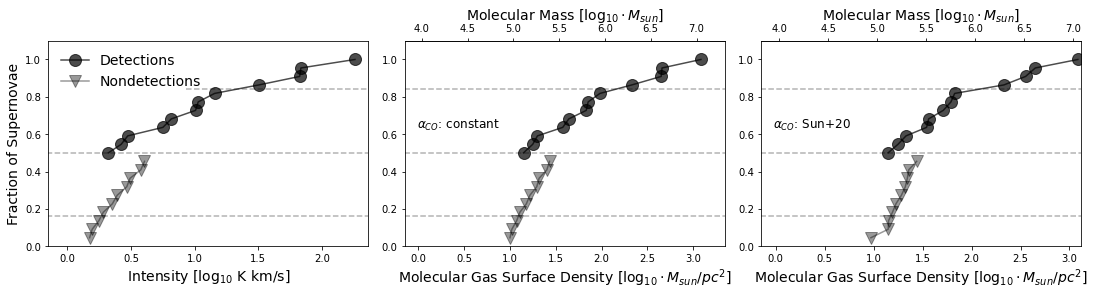

In [5]:


ms = 12
fs = 14

fig, axs = plt.subplots(1, 3, sharex=False, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].plot(logCDFdetection, ydetection, color = 'k', marker = 'o', label = 'Detections', ms = ms, alpha = 0.7)
axs[0].plot(logCDFnondetection, ynondetection, color = 'k', marker = 'v', ms = ms, label = 'Nondetections', alpha = 0.4)
axs[0].axhline(y=0.16, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=0.43, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].legend(frameon=False,loc='upper left', fontsize = fs,facecolor='white', framealpha=1)
axs[0].set_xlim(-0.15, np.log10(CDFdetection[-1] + 50))
axs[0].set_xlabel(r'Intensity [$\log_{10}$ K km/s]', fontsize = fs)
axs[0].set_ylabel('Fraction of Supernovae', fontsize = fs)
axs[0].set_ylim(0.0, 1.1)


axs[1].plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'k',marker = 'o', ms = ms, alpha = 0.7)
axs[1].plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'k', marker = 'v', ms = ms, alpha = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
axs[1].annotate(r'$\alpha_{CO}$: constant', xy=(95, 129), xycoords='axes points',
            size=12, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = fs)
axs[1].set_xlim(-0.15, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs[1].set_ylim(0.0, 1.1)


axs[2].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'k', alpha = 0.7)
axs[2].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = 'v',color = 'k', ms = ms, alpha = 0.4)
axs[2].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax2 = axs[2].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = fs)
axs[2].set_xlim(-0.15, np.log10(CDFdetection_mgsd_ca[-1] + 100))
axs[2].set_ylim(0.0, 1.1)
axs[2].annotate(r'$\alpha_{CO}$: Sun+20', xy=(90, 129), xycoords='axes points',
            size=12, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))



<ipython-input-6-267ba22686cf>:42: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


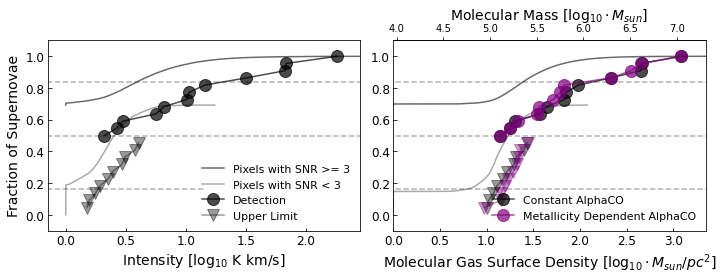

In [6]:
# Put alphaCOs on same plot

ms = 12
fs = 14

fig, axs = plt.subplots(1,2, sharex=False, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(10)
axs[0].plot(logCDFAPIx, APIy, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[0].plot(logCDFAPLx, APLy, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[0].plot(logCDFdetection, ydetection, color = 'k', marker = 'o', label = 'Detection', ms = ms, alpha = 0.7)
axs[0].plot(logCDFnondetection, ynondetection, color = 'k', marker = 'v', ms = ms, label = 'Upper Limit', alpha = 0.4)
axs[0].axhline(y=0.16, xmin=-0.3, xmax = 0.5, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].legend(frameon=False,loc='lower right', fontsize = 11,facecolor='white', framealpha=1)
axs[0].set_xlim(-0.15, np.log10(CDFdetection[-1] + 100))
axs[0].set_xlabel(r'Intensity [$\log_{10}$ K km/s]', fontsize = fs)
axs[0].set_ylabel('Fraction of Supernovae', fontsize = fs)
axs[0].tick_params(axis='both', direction = "in", labelsize = 12)
axs[0].set_ylim(-0.1, 1.1)


axs[1].plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'dimgrey', linestyle = '-')
axs[1].plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'darkgrey', linestyle = '-')
#axs[1].plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'purple', linestyle = '-', label = 'Pixels with SNR >= 3')
#axs[1].plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'purple', linestyle = '-', label = 'Pixels with SNR < 3')
axs[1].plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'k',marker = 'o', ms = ms, alpha = 0.7, label="Constant AlphaCO")
axs[1].plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'k', marker = 'v', ms = ms, alpha = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = fs)
secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = fs)
axs[1].set_xlim(0.0, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs[1].set_ylim(-0.1, 1.1)
axs[1].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'purple', alpha = 0.7, label="Metallicity Dependent AlphaCO")
axs[1].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = 'v',color = 'purple', ms = ms, alpha = 0.4)
axs[1].legend(frameon=False,loc='lower right', fontsize = 11,facecolor='white', framealpha=1)
axs[1].tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFs90.png', dpi=300)

<ipython-input-7-5c4bf4dbbca6>:62: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


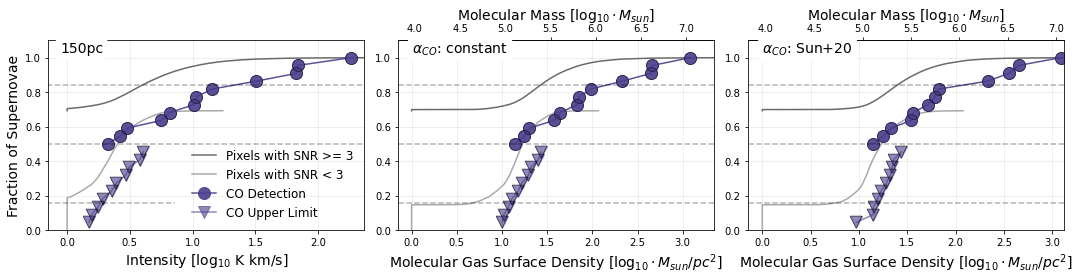

In [7]:
# Make Figure 2
fig, axs = plt.subplots(1, 3, sharex=False, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(15)

axs[0].plot(logCDFAPIx, APIy, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[0].plot(logCDFAPLx, APLy, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[0].plot(logCDFdetection, ydetection, color = 'darkslateblue',marker = 'o', ms = 12, alpha = 0.9, label = 'CO Detection')
axs[0].plot(logCDFnondetection, ynondetection, color = 'darkslateblue', marker = 'v', ms = 12, alpha = 0.6, label = 'CO Upper Limit')
axs[0].plot(logCDFdetection, ydetection, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs[0].plot(logCDFnondetection, ynondetection, color = 'None', marker = 'v', ms = 12, mec = 'k', mew = 0.4)
axs[0].axhline(y=0.16, xmin=-0.3, xmax = 0.4, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].legend(frameon=False,loc='best', fontsize = 12,facecolor='white', framealpha=1)
axs[0].set_xlim(-0.15, np.log10(CDFdetection[-1] + 50))
axs[0].set_xlabel(r'Intensity [$\log_{10}$ K km/s]', fontsize = 14)
axs[0].set_ylabel('Fraction of Supernovae', fontsize = 14)
axs[0].annotate('150pc', xy=(55, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[0].grid(True, alpha = 0.25)
axs[0].set_ylim(0.0, 1.1)

axs[1].plot(logCDFAPIx_mgsd_ca, APIy_mgsd_ca, color = 'dimgrey', linestyle = '-')
axs[1].plot(logCDFAPLx_mgsd_ca, APLy_mgsd_ca, color = 'darkgrey', linestyle = '-')
axs[1].plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'darkslateblue',marker = 'o', ms = 12, alpha = 0.9)
axs[1].plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'darkslateblue', marker = 'v', ms = 12, alpha = 0.6)
axs[1].plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs[1].plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'None', marker = 'v', ms = 12, mec = 'k', mew = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
axs[1].annotate(r'$\alpha_{CO}$: constant', xy=(110, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
axs[1].set_xlim(-0.15, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs[1].grid(True, alpha = 0.25)
axs[1].set_ylim(0.0, 1.1)

axs[2].plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'dimgrey', linestyle = '-')
axs[2].plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'darkgrey', linestyle = '-')
axs[2].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, color = 'darkslateblue',marker = 'o', ms = 12, alpha = 0.9)
axs[2].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, color = 'darkslateblue', marker = 'v', ms = 12, alpha = 0.6)
axs[2].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs[2].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, color = 'None', marker = 'v', ms = 12, mec = 'k', mew = 0.4)
axs[2].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax2 = axs[2].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
axs[2].set_xlim(-0.15, np.log10(CDFdetection_mgsd_mda[-1] + 100))
axs[2].set_ylim(0.0, 1.1)
axs[2].grid(True, alpha = 0.25)
axs[2].annotate(r'$\alpha_{CO}$: Sun+20', xy=(105, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFs2_90pc.png', dpi=300)



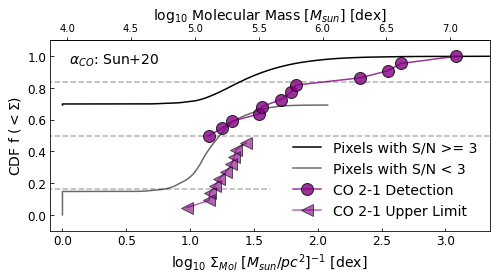

In [8]:
# Single Plot Constant Alpha

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(7)
axs.plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'black', linestyle = '-', label = 'Pixels with S/N >= 3')
axs.plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'dimgrey', linestyle = '-', label = 'Pixels with S/N < 3')
axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
#axs.plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'k',marker = 'o', ms = ms, alpha = 0.7, label="Constant AlphaCO")
#axs.plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'k', marker = 'v', ms = ms, alpha = 0.4)
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.5, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]^{-1}$ [dex]', fontsize = fs)
secax = axs.secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$] [dex]', fontsize = fs)
axs.set_ylabel(r'CDF f $ (<\Sigma$)', fontsize = fs)
axs.set_xlim(-0.1, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'purple',mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs.plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = '<',color = 'purple',mec='black', ms = ms, alpha = 0.6, label = "CO 2-1 Upper Limit")
axs.legend(frameon=False,loc='lower right', fontsize = 14,facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFSingleMDA_90pc.png', dpi=300)

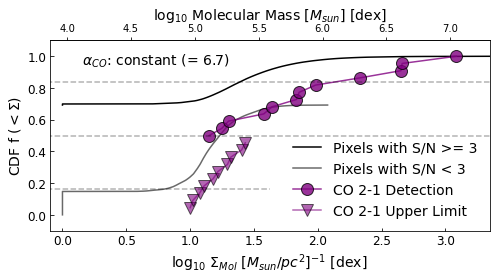

In [9]:
# Single Plot Constant Alpha

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(7)
axs.plot(logCDFAPIx_mgsd_mda, APIy_mgsd_ca, color = 'black', linestyle = '-', label = 'Pixels with S/N >= 3')
axs.plot(logCDFAPLx_mgsd_mda, APLy_mgsd_ca, color = 'dimgrey', linestyle = '-', label = 'Pixels with S/N < 3')
axs.annotate(r'$\alpha_{CO}$: constant (= 6.7)', xy=(180, 179), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'purple',marker = 'o', ms = ms,mec = 'black', alpha = 0.8, label="CO 2-1 Detection")
axs.plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'purple', marker = 'v', ms = ms,mec = 'black', alpha = 0.6, label="CO 2-1 Upper Limit")
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.5, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]^{-1}$ [dex]', fontsize = fs)
secax = axs.secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$] [dex]', fontsize = fs)
axs.set_ylabel(r'CDF f $ (<\Sigma$)', fontsize = fs)
axs.set_xlim(-0.1, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs.set_ylim(-0.1, 1.1)
#axs.plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'purple',mec='black', alpha = 0.8, label="CO 2-1 Detection")
#axs.plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = '<',color = 'purple',mec='black', ms = ms, alpha = 0.6, label = "CO 2-1 Upper Limit")
axs.legend(frameon=False,loc='lower right', fontsize = 14,facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFSingleCA_90pc.png', dpi=300)

<ipython-input-10-31fd018cac22>:82: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


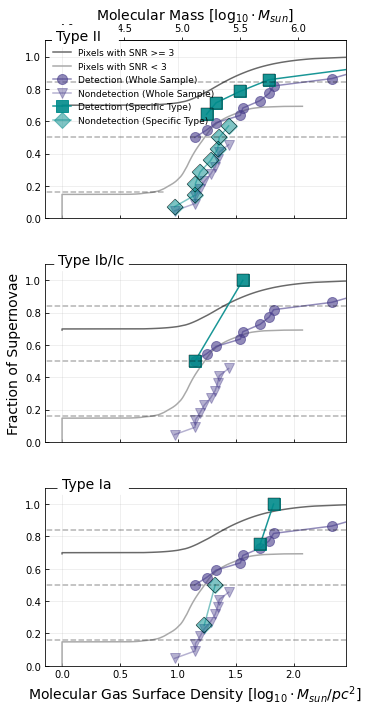

In [10]:
# now redo for each SNe type!

# Make Figure 4
fig, axs = plt.subplots(3, 1, sharex=True, constrained_layout=True)
fig.set_figheight(10)
fig.set_figwidth(5)

axs[0].plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[0].plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[0].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Detection (Whole Sample)')
axs[0].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, color = 'darkslateblue', marker = 'v', ms = 10, alpha = 0.4, label = 'Nondetection (Whole Sample)')
axs[0].plot(logCDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda, color = 'darkcyan', marker = 's', ms = 12, alpha = 0.9, label = 'Detection (Specific Type)')
axs[0].plot(logCDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda, color = 'darkcyan', marker = 'D', ms = 12, alpha = 0.5, label = 'Nondetection (Specific Type)')
axs[0].plot(logCDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda, color = 'None', marker = 's', ms = 12, mec = 'k', mew = 0.4)
axs[0].plot(logCDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda, color = 'None', marker = 'D', ms = 12, mec = 'k', mew = 0.4)

axs[0].axhline(y=0.16, xmin=-0.3, xmax = 0.4, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].set_xlim(-0.15, np.log10(CDFdetection[-1] + 50))
#axs[0].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
secax0 = axs[0].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax0.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
#axs[0].set_ylabel('Fraction of Supernovae', fontsize = 12)
axs[0].annotate('Type II   ', xy=(70, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[0].set_ylim(0.0, 1.1)
axs[0].tick_params(axis='both', direction='in')
axs[0].legend(frameon=False,loc='best', fontsize = 9, facecolor='white', framealpha=1)
axs[0].grid(True, alpha = 0.25)

axs[1].plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'dimgrey', linestyle = '-')
axs[1].plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'darkgrey', linestyle = '-')
axs[1].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6)
axs[1].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, color = 'darkslateblue', marker = 'v', ms = 10, alpha = 0.4)
axs[1].plot(logCDFdetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda, color = 'darkcyan', marker = 's', ms = 12, alpha = 0.9)
axs[1].plot(logCDFnondetectionIbc_mgsd_mda, ynondetectionIbc_mgsd_mda, color = 'darkcyan', marker = 'D', ms = 12, alpha = 0.5)
axs[1].plot(logCDFdetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda, color = 'None', marker = 's', ms = 12, mec = 'k', mew = 0.4)
axs[1].plot(logCDFnondetectionIbc_mgsd_mda, ynondetectionIbc_mgsd_mda, color = 'None', marker = 'D', ms = 12, mec = 'k', mew = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlim(-0.15, logCDFdetection[-1] + 50)
#axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
#secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
#secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)
axs[1].set_xlim(-0.15, np.log10(CDFdetection[-1] + 1000))
axs[1].set_ylabel('Fraction of Supernovae', fontsize = 14)
axs[1].annotate('Type Ib/Ic', xy=(80, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[1].set_ylim(0.0, 1.1)
axs[1].tick_params(axis='both', direction='in')
axs[1].grid(True, alpha = 0.25)


axs[2].plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[2].plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[2].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Detection (Whole Sample)')
axs[2].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, color = 'darkslateblue', marker = 'v', ms = 10, alpha = 0.4, label = 'Upper Limit (Whole Sample)')
axs[2].plot(logCDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda, color = 'darkcyan', marker = 's', ms = 12, alpha = 0.9, label = 'Detection (Specific Type)')
axs[2].plot(logCDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda, color = 'darkcyan', marker = 'D', ms = 12, alpha = 0.5, label = 'Upper Limit (Specific Type)')
axs[2].plot(logCDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda, color = 'None', marker = 's', ms = 12, mec = 'k', mew = 0.4)
axs[2].plot(logCDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda, color = 'None', marker = 'D', ms = 12, mec = 'k', mew = 0.4)
axs[2].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
#secax2 = axs[2].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
#secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)
axs[2].set_xlim(-0.15, np.log10(CDFdetection[-1] + 100))
axs[2].set_ylim(0.0, 1.1)
axs[2].grid(True, alpha = 0.25)
axs[2].tick_params(axis='both', direction='in')
#axs[2].set_ylabel('Fraction of Supernovae', fontsize = 12)
#axs[2].legend(frameon=False,loc='best', fontsize = 9.5, facecolor='white', framealpha=1)
axs[2].annotate('Type Ia   ', xy=(80, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))

plt.tight_layout()
plt.savefig('../Figures/COEmissionByTypeCDFs_90pc.png', dpi=300)
plt.show()


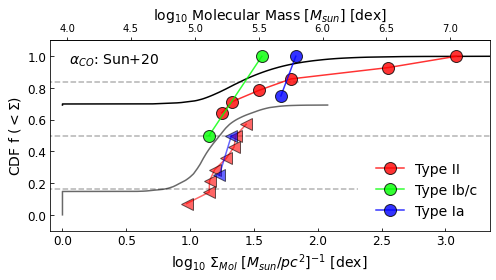

In [11]:
# Single Plot Sun+20 Alpha - All Types!

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(7)
axs.plot(logCDFAPIx_mgsd_mda, APIy_mgsd_mda, color = 'black', linestyle = '-')
axs.plot(logCDFAPLx_mgsd_mda, APLy_mgsd_mda, color = 'dimgrey', linestyle = '-')
axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.7, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]^{-1}$ [dex]', fontsize = fs)
secax = axs.secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$] [dex]', fontsize = fs)
axs.set_ylabel(r'CDF f $ (<\Sigma$)', fontsize = fs)
axs.set_xlim(-0.1, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda, marker = 'o', ms = ms, color = 'red',mec='black', alpha = 0.8, label="Type II")
axs.plot(logCDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda, marker = '<',color = 'red',mec='black', ms = ms, alpha = 0.6)

axs.plot(logCDFdetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda, marker = 'o', ms = ms, color = 'lime',mec='black', alpha = 0.8, label="Type Ib/c")
axs.plot(logCDFnondetectionIbc_mgsd_mda, ynondetectionIbc_mgsd_mda, marker = '<',color = 'lime',mec='black', ms = ms, alpha = 0.6)

axs.plot(logCDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda, marker = 'o', ms = ms, color = 'blue',mec='black', alpha = 0.8, label="Type Ia")
axs.plot(logCDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda, marker = '<',color = 'blue',mec='black', ms = ms, alpha = 0.6)




axs.legend(frameon=False,loc='lower right', fontsize = 14,facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in", labelsize = 12)
plt.tight_layout()
plt.savefig('../Figures/COEmissionCDFByType_90pc.png', dpi=300)

In [12]:

YarrayAP = np.concatenate((APLy, APIy))
XarrayAP = np.concatenate((logCDFAPLx, logCDFAPIx))

YarraySNe = np.concatenate((ynondetection, ydetection))
XarraySNe = np.concatenate((logCDFnondetection, logCDFdetection))

XarrayCA = np.concatenate((logCDFnondetection_mgsd_ca, logCDFdetection_mgsd_ca))
YarrayCA = np.concatenate((ynondetection_mgsd_ca, ydetection_mgsd_ca))

XarrayMDA = np.concatenate((logCDFnondetection_mgsd_mda, logCDFdetection_mgsd_mda))
YarrayMDA = np.concatenate((ynondetection_mgsd_mda, ydetection_mgsd_mda))

XarrayAP_CA = np.concatenate((logCDFAPLx_mgsd_ca, logCDFAPIx_mgsd_ca))
YarrayAP_CA  = np.concatenate((APLy_mgsd_ca, APIy_mgsd_ca))

XarrayAP_MDA = np.concatenate((logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda))
YarrayAP_MDA = np.concatenate((APLy_mgsd_mda, APIy_mgsd_mda))

statsSNe     = findStats(YarraySNe, XarraySNe)
statsSNe.append(np.round(np.mean(XarraySNe),2))

statsCA      = findStats(YarrayCA, XarrayCA)
statsCA.append(np.round(np.mean(XarrayCA),2))

statsMDA     = findStats(YarrayMDA, XarrayMDA)
statsMDA.append(np.round(np.mean(XarrayMDA),2))

statsAP      = findStats(YarrayAP, XarrayAP)
statsAP.append(np.round(np.mean(XarrayAP),2))

statsAP_CA   = findStats(YarrayAP_CA, XarrayAP_CA)
statsAP_CA.append(np.round(np.mean(XarrayAP_CA),2))

statsAP_MDA  = findStats(YarrayAP_MDA, XarrayAP_MDA)
statsAP_MDA.append(np.round(np.mean(XarrayAP_MDA),2))


YarrayII = np.concatenate((ynondetectionII_mgsd_mda, ydetectionII_mgsd_mda))
XarrayII = np.concatenate((logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda))

YarrayIbc = np.concatenate((ynondetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda))
XarrayIbc = np.concatenate((logCDFnondetectionIbc_mgsd_mda, logCDFdetectionIbc_mgsd_mda))

YarrayIa = np.concatenate((ynondetectionIa_mgsd_mda, ydetectionIa_mgsd_mda))
XarrayIa = np.concatenate((logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda))

statsII     = findStats(YarrayII, XarrayII)
statsII.append(np.round(np.mean(XarraySNe),2))

statsIa      = findStats(YarrayIa, XarrayIa)
statsIa.append(np.round(np.mean(XarrayIa),2))

statsIbc     = findStats(YarrayIbc, XarrayIbc)
statsIbc.append(np.round(np.mean(XarrayIbc),2))


CDFStats = Table({'Percentiles' : ["0.05","0.16","0.50","0.84","0.95", "Mean"],
                #'AllPixels'     : statsAP,
                #'AllCA'         : statsAP_CA,
                'AllMDA'        : statsAP_MDA,
                #'SNe'           : statsSNe,
                #'SNeCA'         : statsCA,
                'SNeMDA'        : statsMDA,                   
                'TypeII'        : statsII,
                'TypeIbc'       : statsIbc,
                'TypeIa'        : statsIa
                 })
CDFStats.write('../Data/3.3b.PercentilesStats_90pc.tex', format = 'latex', overwrite=True)

CDFStats


Percentiles,AllMDA,SNeMDA,TypeII,TypeIbc,TypeIa
str4,float64,float64,float64,float64,float64
0.05,0.0,0.97,0.97,1.15,1.23
0.16,0.78,1.19,1.15,1.15,1.23
0.50,1.23,1.15,1.36,1.15,1.32
0.84,1.39,1.83,1.79,1.56,1.71
0.95,1.8,2.65,2.55,1.56,1.83
Mean,1.09,1.6,0.78,1.36,1.52
